      Column 0  Column 1  Column 2  Column 3  Column 4
0       188334  847398.0    759453  267860.0    656681
1       197391  856848.0    749929  288325.0    692598
2       197428  862004.0    757387  270594.0    696651
3       200298  836123.0    744488  288395.0    685092
4       201705  850647.0    759159  295459.0    697822
...        ...       ...       ...       ...       ...
3371    993018  252769.0    911013  919953.0    566143
3372    994359  281832.0    914319  926627.0    584893
3373    995811  285497.0    932557  939987.0    560558
3374    996632  259780.0    915169  939426.0    553930
3375   1000000  265392.0    923587  925580.0    546316

[3376 rows x 5 columns]


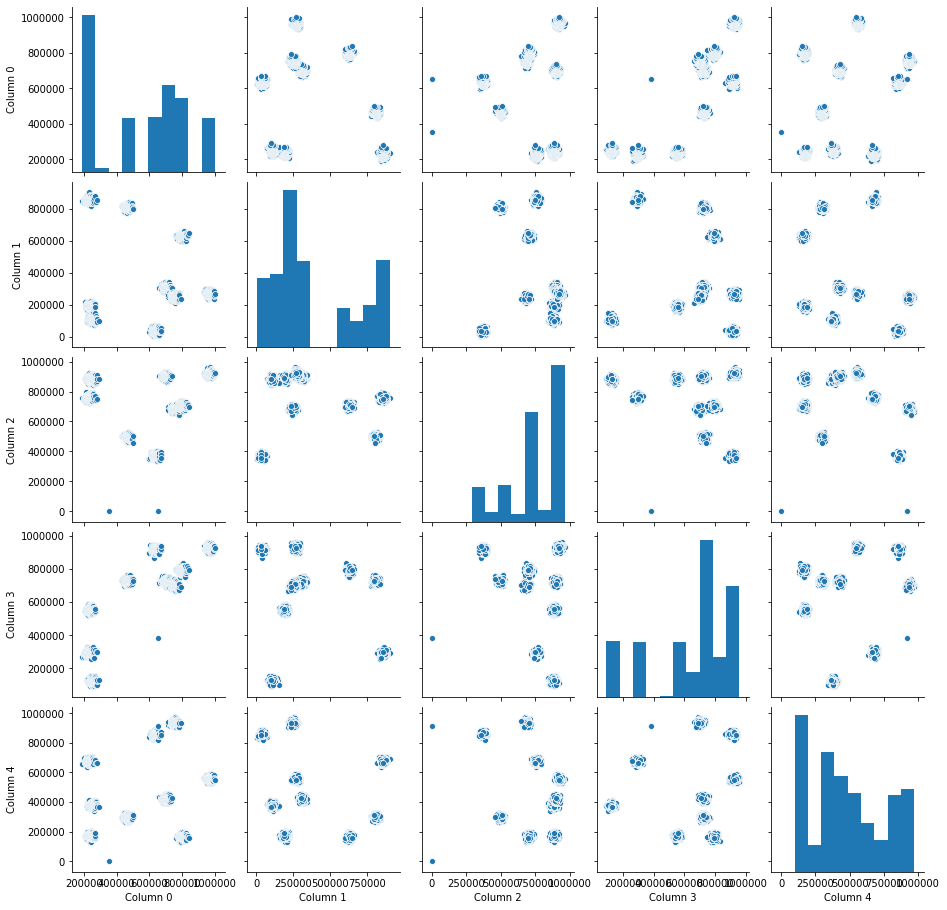

In [1]:
import warnings
warnings.filterwarnings('ignore') # Hide warning messages (A lot of warnings come up because the images are huge)



###################
### Question 1 ####
###################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans

dimensions = 5 # Change the number of dimensions here to change which file gets read

colnames = ["Column %s" % i for i in range(dimensions)]

df = pd.read_csv("dim%s.txt" % dimensions, sep="    ", skiprows=None,names=colnames,index_col=False) # Separator should be blank space

print(df)

seaborn.pairplot(df)


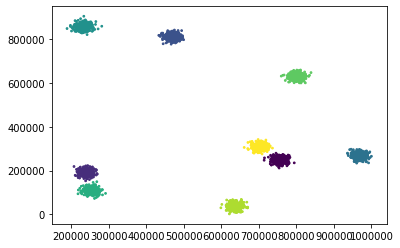

In [2]:
# Question 1, continued

from sklearn.cluster import KMeans

X = df.dropna()

kmeans = KMeans(9) # K-means clustering with 9 clusters
kmeans.fit(X) # Fit the model to the data

plt.scatter(X["Column 0"], X["Column 1"], c=kmeans.predict(X), s=3) 
# c=kmeans.predict(X) tells matplotlib to colour each data point according to which cluster it belongs to


In [3]:
import nltk
nltk.download('punkt')
nltk.download('names')
nltk.download('stopwords')
from nltk.corpus import names


def getWordFreq(text):
    '''
    This function is copy-pasted from the sample code on NLTK (with comments removed for brevity).
    Creates a dictionary with the frequency of each word.
    '''
    TextSentences = nltk.sent_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    WFreq = {}
    for word in nltk.word_tokenize(text):
        if word not in stopwords:
            if word not in WFreq:
                WFreq[word] = 1
            else:
                WFreq[word] += 1
    return WFreq



def getnames(filename):
    '''
    Returns a list of names found in the given file and the corresponding number of occurences. 
    Sorted from most frequent to least frequent
    '''
    with open(filename, "r") as f:
        text = f.read()
        
    freqs = getWordFreq(text) # Use the function from the example code to get frequencies
    
    namefreqs = {} # Create a new dictionary which will only hold the word frequencies which correspond to names
    for name in names.words():
        if name in freqs.keys(): # For each item, check if they're in the name list before adding them to the new dict
            namefreqs[name] = freqs[name]
    
    # This block of code is an alternative way of doing the above loop, but it's slower for large files because it has to go over each word in the file
    '''for key,value in freqs.items():
        if key in names.words(): 
            namefreqs[key] = value'''
    
    # Uncomment this block of code to make the final list contain relative frequencies instead of total number of occurences
    '''max_freq = max(namefreqs.values())
    for word in namefreqs: # Divide each frequency by the maximum to get the relative frequency
        namefreqs[word] = namefreqs[word]/max_freq'''
    
    namefreqs = dict(sorted(namefreqs.items(), key=lambda item: item[1],reverse=True)) # Sort the values in descending order
    return namefreqs

print("Mambo no. 5 lyrics - name frequencies:")
print(getnames("mambono5.txt")) # Copy-pasted from site

print("\nWikipedia entry on history of Chicago name frequencies:\n")
print(getnames("wikipedia-chicago.txt")) # Copy-pasted the wikipedia source markup for the page

print("\nWar and peace name frequencies:\n")
print(getnames("book-war-and-peace.txt"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mambo no. 5 lyrics - name frequencies:
{'Rita': 4, 'Sandra': 4, 'Erica': 3, 'Jessica': 3, 'Mary': 3, 'Monica': 3, 'Tina': 3, 'Angela': 1, 'Pamela': 1}

Wikipedia entry on history of Chicago name frequencies:

{'Park': 20, 'John': 16, 'Richard': 13, 'West': 11, 'French': 10, 'Paul': 8, 'William': 8, 'Bird': 6, 'Lincoln': 6, 'Louis': 6, 'Urban': 6, 'Holli': 5, 'Jane': 5, 'Mary': 5, 'David': 5, 'James': 5, 'Joseph': 5, 'Mayor': 5, 'Melvin': 5, 'Peter': 5, 'Town': 5, 'Ann': 4, 'April': 4, 'Harold': 4, 'See': 4, 'Smith': 4, 'La': 3, 'Perry': 3, 'Windy': 3, 'Carl': 3, 'Charles': 3, 'Dominic': 3, 'Douglas': 3, 'King': 3, 'Madison': 3, 'Michael': 3, 'Robert': 3, 'Roman': 3, 'Stephen': 3, 'Washington': 3, 'Yankee': 3, 'Bill': 2, 'Christine': 2, 'Daniel': 2, 'Francis': 2, 'Frank': 2, 'Jean': 2, 'June': 2, 'Louise': 2, 'Lucky': 2, 'May': 2, 'Al': 2, 'Albert': 2, 'Alfred': 2, 'August': 2, 'Christopher': 2, 'Clark': 2, 'Edward': 2, 'Mark': 2, 'Mayer': 2, 'Norman': 2, 'Parker': 2, 'Pierce': 2, 'Pier

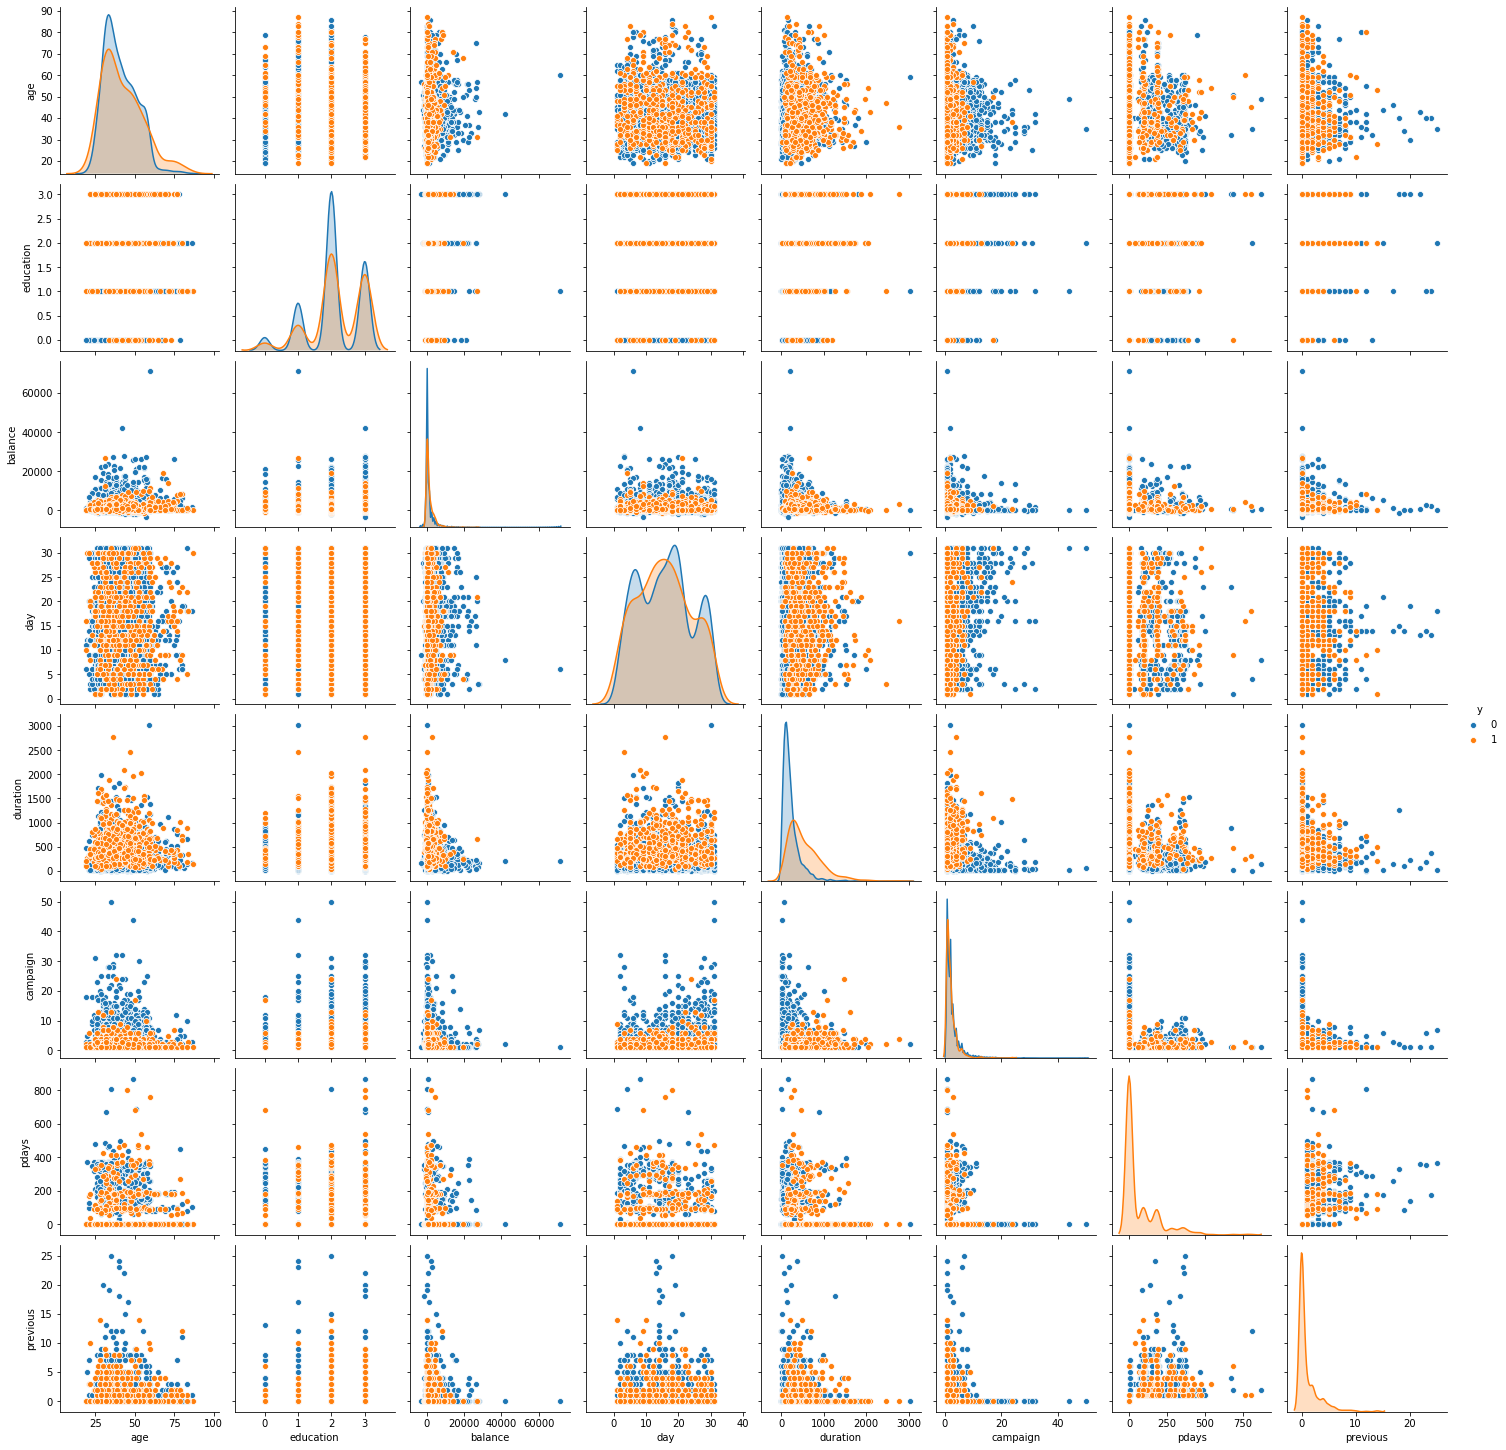

In [4]:
###################
### Question 3 ####
###################
import pandas as pd
import seaborn as sns


def CodeFromLastWeek():
    # A very condensed version of the example solutions from last week, all put into a single function for easier reading

    with open("bank.csv","r") as f:
        colnames = f.readline().split(";")
        colnames = [i.strip("\n").strip('"') for i in colnames]
    df = pd.read_csv("bank.csv",skiprows=[0],sep=";",names=colnames) # Get the CSV data into a dataframe

    df["y"] = df["y"].map({"yes":1,"no":0}) # Change yes/no to 0/1
    df["education"] = df["education"].map({"unknown":0,"primary":1,"secondary":2,"tertiary":3}) # Change education to 0,1,2,3
    
    return df



df = CodeFromLastWeek()

bankplot = sns.pairplot(df,hue="y") # Colour each data point according to the "y" column (i.e. whether the person signed up or not)
# bankplot.map_lower(sns.kdeplot, levels=4, color=".2") # Adds contour lines